In [1]:
import pandas as pd
import glob
import os
from pathlib import Path

Climate Data

In [2]:
path = r'G:\.shortcut-targets-by-id\1dckeCjOe69iKuNUVO15xa2h-xG40o_p8\Team 21\Dataset Information\Datasets\Current\Climate CA\Original_File_Names'

In [3]:
all_files = glob.glob(os.path.join(path, "PRISM*.csv"))

In [4]:
climate = pd.concat((pd.read_csv(f, index_col=None, header=0,skiprows=10).assign(county =os.path.basename(f)) 
                     for f in all_files))

In [5]:
climate['county'] = climate['county'].map(lambda x: x.lstrip('PRISM_'))

In [6]:
climate['county'] = climate['county'].str.split('_ppt').str[0]

In [7]:
climate['Date']=pd.to_datetime(climate['Date'])
climate=climate.rename(columns={"Date":"date","ppt (mm)":"precip_mm","tmin (degrees C)":"temp_min_celsius",
                                "tmean (degrees C)":"temp_mean_celsius","tmax (degrees C)":"temp_max_celsius"})

In [8]:
climate.head(7)

,date,precip_mm,temp_min_celsius,temp_mean_celsius,temp_max_celsius,county
0,2006-01-01,0.0,6.5,12.6,18.6,san_bernardino
1,2006-01-02,0.0,6.1,11.1,16.2,san_bernardino
2,2006-01-03,0.0,6.8,13.2,19.6,san_bernardino
3,2006-01-04,0.0,4.3,11.0,17.8,san_bernardino
4,2006-01-05,0.0,4.2,11.7,19.1,san_bernardino
5,2006-01-06,0.0,3.2,12.5,21.8,san_bernardino
6,2006-01-07,0.0,2.1,11.9,21.7,san_bernardino


In [9]:
climate.set_index('date',inplace=True)

In [10]:
climate_clean=climate.groupby('county').resample('W-Sat').mean()

In [11]:
climate_clean=climate_clean.reset_index()

In [12]:
climate_clean.head()

,county,date,precip_mm,temp_min_celsius,temp_mean_celsius,temp_max_celsius
0,alameda,2006-01-07,9.561429,5.457143,10.342857,15.228571
1,alameda,2006-01-14,1.148571,3.728571,9.557143,15.385714
2,alameda,2006-01-21,3.211429,2.857143,8.000000,13.114286
3,alameda,2006-01-28,0.437143,3.257143,8.657143,14.100000
4,alameda,2006-02-04,2.841429,6.414286,11.185714,15.928571


In [13]:
climate_clean['county'].unique()

array(['alameda', 'alpine', 'amador', 'butte', 'calaveras', 'colusa',
       'contra_costa', 'del_norte', 'el_dorado', 'fresno', 'glenn',
       'humboldt', 'imperial', 'inyo', 'kern', 'kings', 'lake', 'lassen',
       'los_angeles', 'madera', 'marin', 'mariposa', 'mendocino',
       'merced', 'modoc', 'mono', 'monterey', 'napa', 'nevada', 'orange',
       'placer', 'plumas', 'riverside', 'sacramento', 'san_benito',
       'san_bernardino', 'san_diego', 'san_francisco', 'san_joaquin',
       'san_luis_obispo', 'san_mateo', 'santa_barbara', 'santa_clara',
       'santa_cruz', 'shasta', 'sierra', 'siskiyou', 'solano', 'sonoma',
       'stanislaus', 'sutter', 'tehama', 'trinity', 'tulare', 'tuolumne',
       'ventura', 'yolo', 'yuba'], dtype=object)

In [14]:
climate_clean['county'] = climate_clean['county'].str.replace('_',' ')

In [15]:
climate_clean['county'] = climate_clean['county'].str.title()

Case Data

In [16]:
wnv=pd.read_csv('WNV_CA.csv')

In [17]:
mmwr=pd.read_csv('mmwr_week.csv')

In [18]:
mmwr.head()

,mmwr_week,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,1/7/2006,1/6/2007,1/5/2008,1/10/2009,1/9/2010,1/8/2011,1/7/2012,1/5/2013,1/4/2014,1/10/2015,1/9/2016,1/7/2017,1/6/2018,1/5/2019,1/4/2020,1/9/2021
1,2,1/14/2006,1/13/2007,1/12/2008,1/17/2009,1/16/2010,1/15/2011,1/14/2012,1/12/2013,1/11/2014,1/17/2015,1/16/2016,1/14/2017,1/13/2018,1/12/2019,1/11/2020,1/16/2021
2,3,1/21/2006,1/20/2007,1/19/2008,1/24/2009,1/23/2010,1/22/2011,1/21/2012,1/19/2013,1/18/2014,1/24/2015,1/23/2016,1/21/2017,1/20/2018,1/19/2019,1/18/2020,1/23/2021
3,4,1/28/2006,1/27/2007,1/26/2008,1/31/2009,1/30/2010,1/29/2011,1/28/2012,1/26/2013,1/25/2014,1/31/2015,1/30/2016,1/28/2017,1/27/2018,1/26/2019,1/25/2020,1/30/2021
4,5,2/4/2006,2/3/2007,2/2/2008,2/7/2009,2/6/2010,2/5/2011,2/4/2012,2/2/2013,2/1/2014,2/7/2015,2/6/2016,2/4/2017,2/3/2018,2/2/2019,2/1/2020,2/6/2021


In [19]:
wnv.head()

,year,mmwr_week,county,case_count
0,2006,35,Alameda,1
1,2006,33,Butte,4
2,2006,34,Butte,1
3,2006,35,Butte,10
4,2006,36,Butte,2


In [20]:
wnv['county'].unique()

array(['Alameda', 'Butte', 'Colusa', 'Contra Costa', 'El Dorado',
       'Fresno', 'Glenn', 'Imperial', 'Kern', 'Kings', 'Lake',
       'Los Angeles', 'Marin', 'Merced', 'Modoc', 'Mono', 'Napa',
       'Nevada', 'Orange', 'Placer', 'Riverside', 'Sacramento',
       'San Bernardino', 'San Diego', 'San Joaquin', 'San Luis Obispo',
       'Santa Clara', 'Shasta', 'Solano', 'Stanislaus', 'Sutter',
       'Tehama', 'Tulare', 'Ventura', 'Yolo', 'Yuba', 'Madera',
       'Mendocino', 'Sonoma', 'Calaveras', 'Santa Barbara', 'Monterey',
       'San Francisco', 'Amador', 'Santa Cruz', 'Siskiyou', 'Inyo',
       'Humboldt', 'Tuolumne'], dtype=object)

In [21]:
mmwr = pd.melt(mmwr,id_vars = "mmwr_week", value_vars = ["2021","2020","2019","2018","2017","2016","2015",
                                                         "2014","2013","2012","2011","2010","2009","2008","2007","2006"])

In [22]:
mmwr = mmwr.rename(columns = {'variable':'year', 'value':'date'})
mmwr.head()

,mmwr_week,year,date
0,1,2021,1/9/2021
1,2,2021,1/16/2021
2,3,2021,1/23/2021
3,4,2021,1/30/2021
4,5,2021,2/6/2021


In [23]:
mmwr['period']=mmwr[['year','mmwr_week']].astype(str).agg('_'.join, axis=1)
mmwr.head()

,mmwr_week,year,date,period
0,1,2021,1/9/2021,2021_1
1,2,2021,1/16/2021,2021_2
2,3,2021,1/23/2021,2021_3
3,4,2021,1/30/2021,2021_4
4,5,2021,2/6/2021,2021_5


In [24]:
wnv['period'] = wnv[['year','mmwr_week']].astype(str).agg('_'.join, axis=1)
wnv.head()

,year,mmwr_week,county,case_count,period
0,2006,35,Alameda,1,2006_35
1,2006,33,Butte,4,2006_33
2,2006,34,Butte,1,2006_34
3,2006,35,Butte,10,2006_35
4,2006,36,Butte,2,2006_36


In [25]:
wnv=wnv.merge(mmwr[['period','date']], on='period', how='left')

In [26]:
wnv['date']=pd.to_datetime(wnv['date'])

In [27]:
wnv=wnv[['year','mmwr_week','date','county','case_count']]

In [28]:
wnv.sort_values(by=['county','date'], inplace=True)

In [30]:
wnv_clean=wnv[['county','date','case_count']]

In [31]:
wnv_clean.head()

,county,date,case_count
0,Alameda,2006-09-02,1
300,Alameda,2008-08-09,1
512,Alameda,2010-10-30,1
673,Alameda,2012-10-20,1
674,Alameda,2012-10-27,1


In [32]:
combined=climate_clean.merge(wnv_clean,on=['county','date'],how='left')

In [33]:
combined['case_count']=combined['case_count'].fillna(0)

In [34]:
combined.head()

,county,date,precip_mm,temp_min_celsius,temp_mean_celsius,temp_max_celsius,case_count
0,Alameda,2006-01-07,9.561429,5.457143,10.342857,15.228571,0.0
1,Alameda,2006-01-14,1.148571,3.728571,9.557143,15.385714,0.0
2,Alameda,2006-01-21,3.211429,2.857143,8.000000,13.114286,0.0
3,Alameda,2006-01-28,0.437143,3.257143,8.657143,14.100000,0.0
4,Alameda,2006-02-04,2.841429,6.414286,11.185714,15.928571,0.0


In [35]:
coordinates=pd.read_csv('county_coordinates.csv',header=0)

def f(row):
    if row['latitude_north']<35:
        val=1
    elif row['latitude_north']>=35 and row['latitude_north']<37:
        val=2
    elif row['latitude_north']>=37 and row['latitude_north']<39:
        val=3
    elif row['latitude_north']>=39 and row['latitude_north']<41:
        val=4
    elif row['latitude_north']>=41:
        val=5
    return val
        
coordinates['region']=coordinates.apply(f,axis=1)

coordinates.head(10)

,county,longitude_west,latitude_north,region
0,imperial,116,33,1
1,orange,118,33,1
2,san_diego,117,33,1
3,los_angeles,118,34,1
4,riverside,117,34,1
5,ventura,119,34,1
6,kern,120,35,2
7,san_bernardino,117,35,2
8,san_luis_obispo,121,35,2
9,santa_barbara,120,35,2


In [36]:
coordinates['county'] = coordinates['county'].str.replace('_',' ')
coordinates['county'] = coordinates['county'].str.title()

In [37]:
coordinates.head(10)

,county,longitude_west,latitude_north,region
0,Imperial,116,33,1
1,Orange,118,33,1
2,San Diego,117,33,1
3,Los Angeles,118,34,1
4,Riverside,117,34,1
5,Ventura,119,34,1
6,Kern,120,35,2
7,San Bernardino,117,35,2
8,San Luis Obispo,121,35,2
9,Santa Barbara,120,35,2


In [38]:
combined=pd.merge(combined, coordinates, how="left", on=['county'])

In [39]:
combined.head(20)

,county,date,precip_mm,temp_min_celsius,temp_mean_celsius,temp_max_celsius,case_count,longitude_west,latitude_north,region
0,Alameda,2006-01-07,9.561429,5.457143,10.342857,15.228571,0.0,122,37,3
1,Alameda,2006-01-14,1.148571,3.728571,9.557143,15.385714,0.0,122,37,3
2,Alameda,2006-01-21,3.211429,2.857143,8.000000,13.114286,0.0,122,37,3
3,Alameda,2006-01-28,0.437143,3.257143,8.657143,14.100000,0.0,122,37,3
4,Alameda,2006-02-04,2.841429,6.414286,11.185714,15.928571,0.0,122,37,3
5,Alameda,2006-02-11,0.094286,3.071429,11.171429,19.257143,0.0,122,37,3
6,Alameda,2006-02-18,0.532857,2.500000,9.714286,16.914286,0.0,122,37,3
7,Alameda,2006-02-25,0.222857,-0.200000,7.442857,15.100000,0.0,122,37,3
8,Alameda,2006-03-04,6.954286,4.428571,9.871429,15.342857,0.0,122,37,3
9,Alameda,2006-03-11,5.747143,3.600000,8.428571,13.271429,0.0,122,37,3


In [40]:
combined['month']=pd.DatetimeIndex(combined['date']).month

In [41]:
season_dict={1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}
combined['season']=combined['month'].map(season_dict)

Population Data

In [42]:
pop = pd.read_csv('cal_population.csv')

In [43]:
combined['Year']=pd.DatetimeIndex(combined['date']).year

In [44]:
combined['pop_merge'] = combined[['county','Year']].astype(str).agg('_'.join, axis=1)
pop['pop_merge'] = pop[['county','Year']].astype(str).agg('_'.join, axis=1)

In [45]:
combined = pd.merge(combined,pop[['pop_merge','Population']], how='left', on=['pop_merge'])

In [46]:
combined = combined.drop(['pop_merge'],axis=1)

In [47]:
combined['cases_per_100k'] = combined['case_count']/(combined['Population']/100000)

In [48]:
combined=combined.set_index(['date'])

In [49]:
combined.to_csv('combined.csv')

EDA

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
df = combined.copy()

In [53]:
df.head()

,county,precip_mm,temp_min_celsius,temp_mean_celsius,temp_max_celsius,case_count,longitude_west,latitude_north,region,month,season,Year,Population,cases_per_100k
date,,,,,,,,,,,,,,
2006-01-07,Alameda,9.561429,5.457143,10.342857,15.228571,0.0,122,37,3,1,1,2006,1462371,0.0
2006-01-14,Alameda,1.148571,3.728571,9.557143,15.385714,0.0,122,37,3,1,1,2006,1462371,0.0
2006-01-21,Alameda,3.211429,2.857143,8.000000,13.114286,0.0,122,37,3,1,1,2006,1462371,0.0
2006-01-28,Alameda,0.437143,3.257143,8.657143,14.100000,0.0,122,37,3,1,1,2006,1462371,0.0
2006-02-04,Alameda,2.841429,6.414286,11.185714,15.928571,0.0,122,37,3,2,1,2006,1462371,0.0


In [54]:
df.dtypes

county                object
precip_mm            float64
temp_min_celsius     float64
temp_mean_celsius    float64
temp_max_celsius     float64
case_count           float64
longitude_west         int64
latitude_north         int64
region                 int64
month                  int64
season                 int64
Year                   int64
Population             int64
cases_per_100k       float64
dtype: object

In [55]:
columns = ['case_count','Population','cases_per_100k','precip_mm','temp_min_celsius',
           'temp_mean_celsius','temp_max_celsius']
df[columns].describe(include='all')

,case_count,Population,cases_per_100k,precip_mm,temp_min_celsius,temp_mean_celsius,temp_max_celsius
count,47676.000000,4.767600e+04,47676.000000,47676.000000,47676.000000,47676.000000,47676.000000
mean,0.116558,6.589594e+05,0.025624,1.830498,8.042327,14.868689,21.694617
std,0.956322,1.434378e+06,0.283189,4.237243,6.306959,7.363674,8.729371
min,0.000000,1.129000e+03,0.000000,0.000000,-16.371429,-10.242857,-6.257143
25%,0.000000,4.542400e+04,0.000000,0.000000,3.714286,9.542857,15.085714
50%,0.000000,1.812150e+05,0.000000,0.000000,7.885714,14.557143,21.357143
75%,0.000000,6.993470e+05,0.000000,1.554643,12.428571,20.471429,28.571429
max,40.000000,1.028373e+07,14.003641,62.924286,30.242857,38.171429,46.485714


In [56]:
df.isnull().sum()

county               0
precip_mm            0
temp_min_celsius     0
temp_mean_celsius    0
temp_max_celsius     0
case_count           0
longitude_west       0
latitude_north       0
region               0
month                0
season               0
Year                 0
Population           0
cases_per_100k       0
dtype: int64

In [57]:
df['county'].unique()#Check for missing values

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

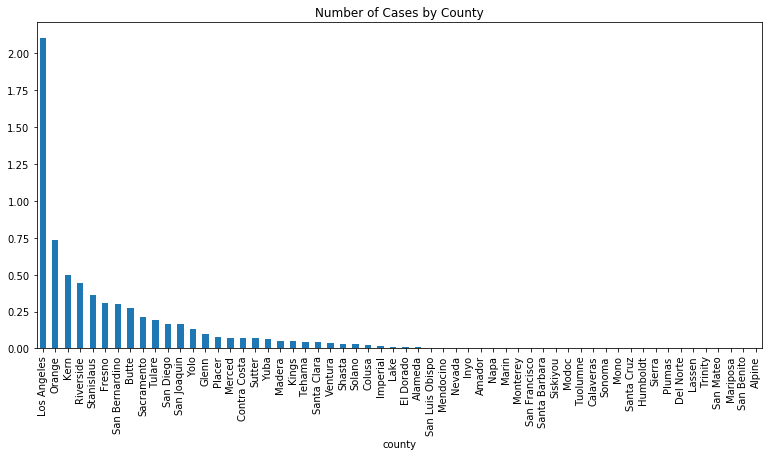

In [58]:
df.groupby('county').mean().sort_values('case_count', ascending=False).plot(kind='bar',
                                y='case_count',figsize=(13,6), legend=False,
                                title = "Number of Cases by County")

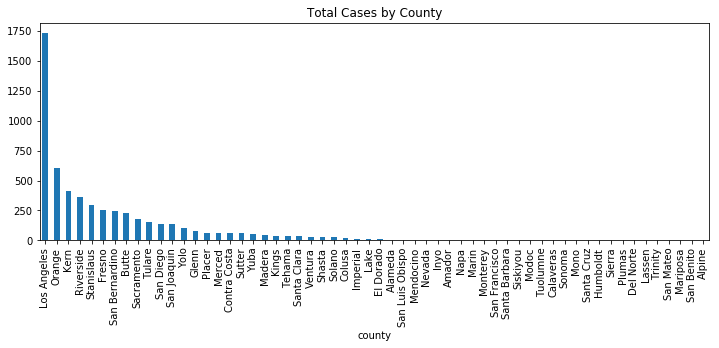

In [59]:
df.groupby('county').sum().sort_values('case_count', ascending=False).plot(kind='bar',
                            y='case_count',figsize=(12,4),
                            legend=False, title = "Total Cases by County")

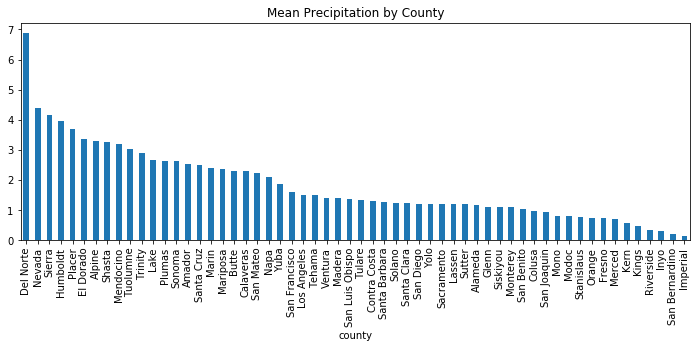

In [60]:
df.groupby('county').mean().sort_values('precip_mm', ascending=False).plot(kind='bar',
                            y='precip_mm',figsize=(12,4),
                            legend = False,title = "Mean Precipitation by County")

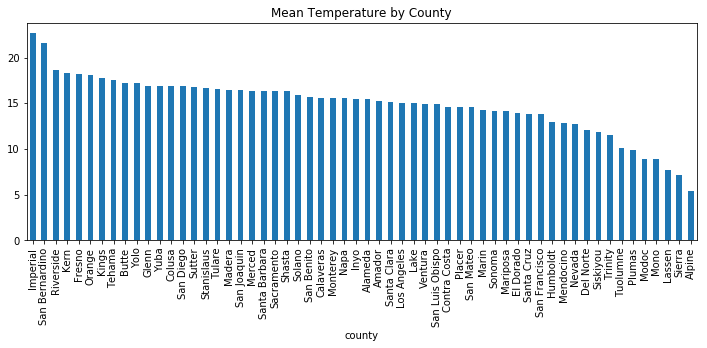

In [62]:
df.groupby('county').mean().sort_values('temp_mean_celsius', ascending=False).plot(kind='bar',
                            y='temp_mean_celsius',legend=False,
                            title = "Mean Temperature by County",figsize=(12,4))

In [118]:
df[['case_count','precip_mm','temp_mean_celsius']].corr()

,case_count,precip_mm,temp_mean_celsius
case_count,1.000000,-0.040043,0.086111
precip_mm,-0.040043,1.000000,-0.411966
temp_mean_celsius,0.086111,-0.411966,1.000000


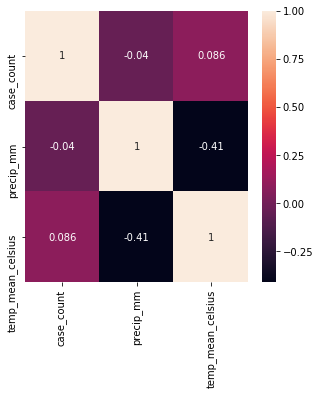

In [120]:
corrMatrix = df[['case_count','precip_mm','temp_mean_celsius']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

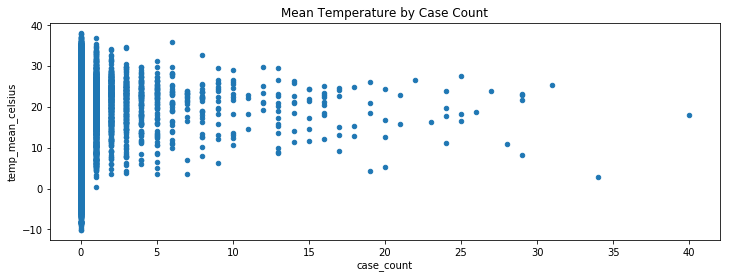

In [63]:
df.plot(kind='scatter',x='case_count', y='temp_mean_celsius',figsize=(12,4),
                                title='Mean Temperature by Case Count')

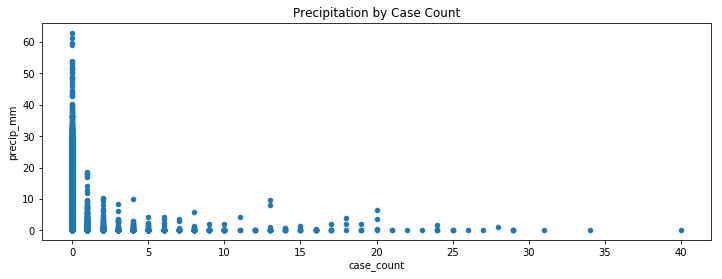

In [64]:
df.plot(kind='scatter',x='case_count', y='precip_mm',figsize=(12,4),
                                title='Precipitation by Case Count')

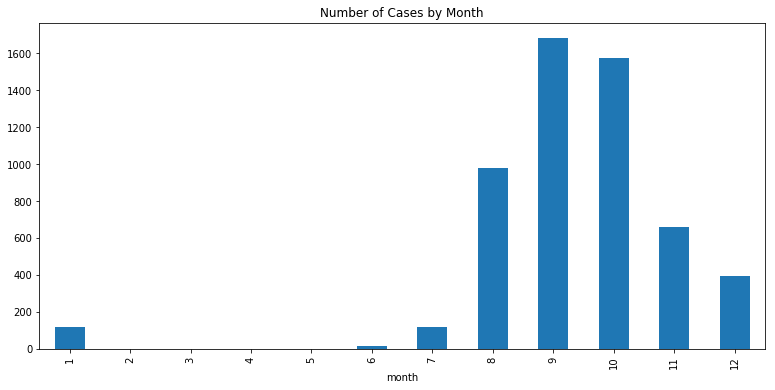

In [124]:
df.groupby('month')['case_count'].sum().plot(kind='bar',
                                y='month',figsize=(13,6), legend=False,
                                title = "Number of Cases by Month")

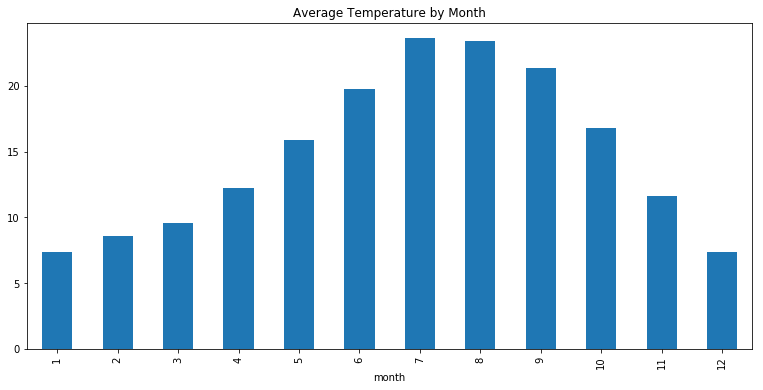

In [125]:
df.groupby('month')['temp_mean_celsius'].mean().plot(kind='bar',
                                y='month',figsize=(13,6), legend=False,
                                title = "Average Temperature by Month")

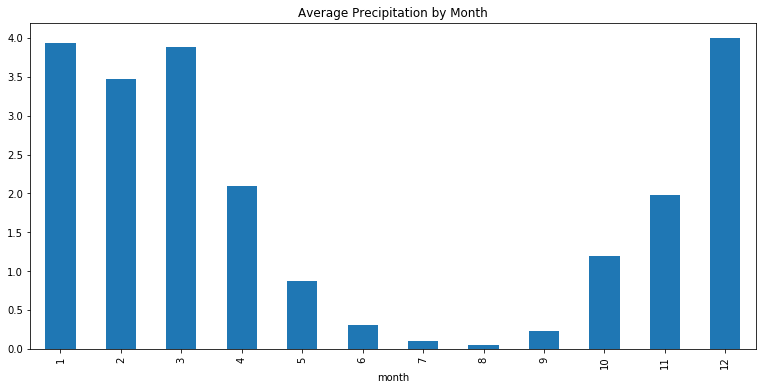

In [126]:
df.groupby('month')['precip_mm'].mean().plot(kind='bar',
                                y='month',figsize=(13,6), legend=False,
                                title = "Average Precipitation by Month")

<function matplotlib.pyplot.show(*args, **kw)>

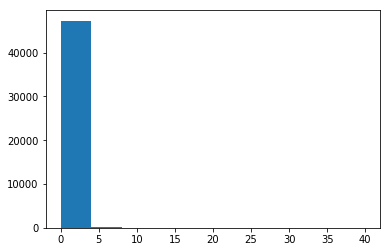

In [66]:
#Histogram all cases
plt.hist(df['case_count'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

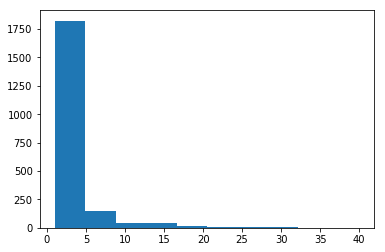

In [67]:
#Histogram cases > 0
positive_case = df[df['case_count']>0]
plt.hist(positive_case['case_count'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

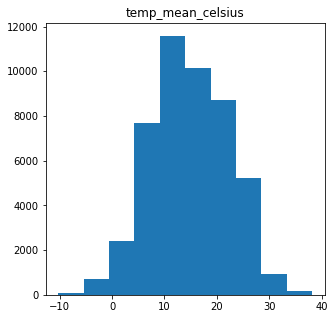

In [88]:
plt.hist(df['temp_mean_celsius'])
plt.title("temp_mean_celsius")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

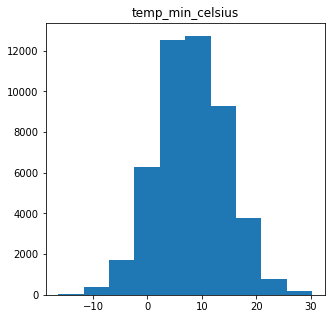

In [85]:
plt.hist(df['temp_min_celsius'])
plt.title("temp_min_celsius")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

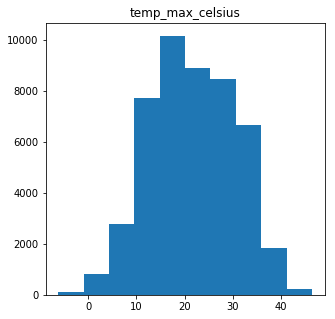

In [86]:
plt.hist(df['temp_max_celsius'])
plt.title("temp_max_celsius")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

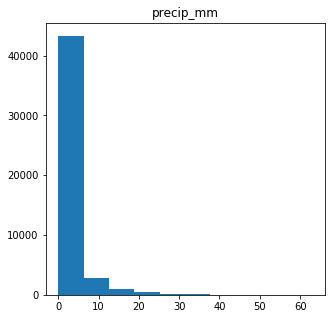

In [87]:
plt.hist(df['precip_mm'])
plt.title("precip_mm")
plt.show

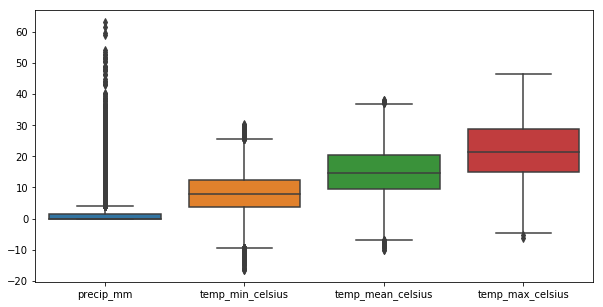

In [82]:
data = df[['precip_mm','temp_min_celsius','temp_mean_celsius','temp_max_celsius']]
ax = sns.boxplot(data=data, orient="v")
plt.rcParams['figure.figsize']=(5,5)

In [127]:
df.head()

,county,precip_mm,temp_min_celsius,temp_mean_celsius,temp_max_celsius,case_count,longitude_west,latitude_north,region,month,season,Year,Population,cases_per_100k
date,,,,,,,,,,,,,,
2006-01-07,Alameda,9.561429,5.457143,10.342857,15.228571,0.0,122,37,3,1,1,2006,1462371,0.0
2006-01-14,Alameda,1.148571,3.728571,9.557143,15.385714,0.0,122,37,3,1,1,2006,1462371,0.0
2006-01-21,Alameda,3.211429,2.857143,8.000000,13.114286,0.0,122,37,3,1,1,2006,1462371,0.0
2006-01-28,Alameda,0.437143,3.257143,8.657143,14.100000,0.0,122,37,3,1,1,2006,1462371,0.0
2006-02-04,Alameda,2.841429,6.414286,11.185714,15.928571,0.0,122,37,3,2,1,2006,1462371,0.0


In [93]:
winter = df[(df['season']==1)]
spring = df[(df['season']==2)]
summer = df[(df['season']==3)]
fall = df[(df['season']==4)]

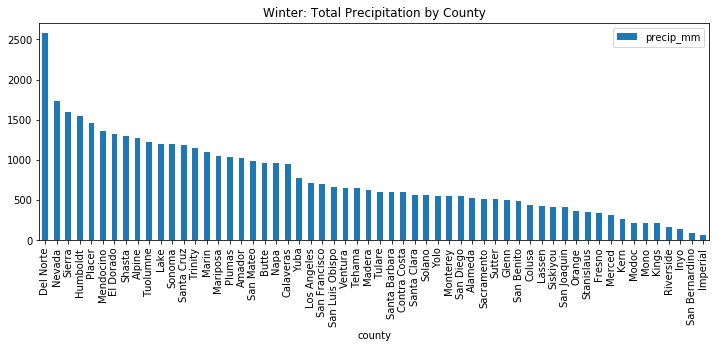

In [94]:
winter.groupby('county').sum().sort_values('precip_mm', ascending=False).plot(kind='bar',y='precip_mm',
                                figsize=(12,4),
                                title='Winter: Total Precipitation by County')

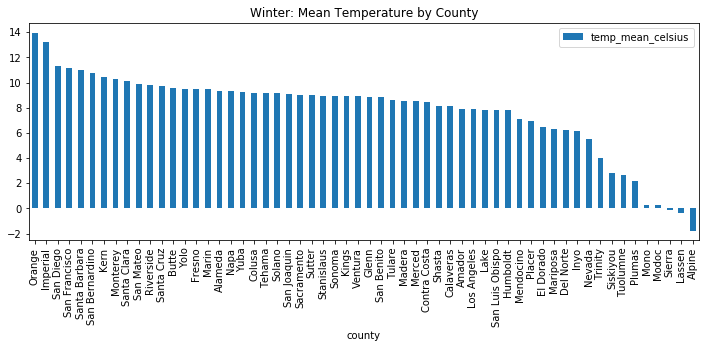

In [95]:
winter.groupby('county').mean().sort_values('temp_mean_celsius', ascending=False).plot(kind='bar',
                                y='temp_mean_celsius',figsize=(12,4),
                                title='Winter: Mean Temperature by County')

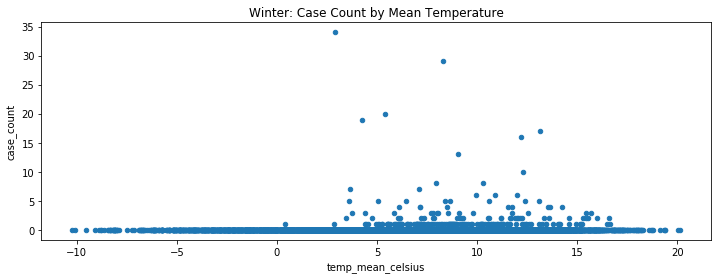

In [96]:
winter.plot(kind='scatter',x='temp_mean_celsius', y='case_count', figsize=(12,4),
                                title='Winter: Case Count by Mean Temperature')

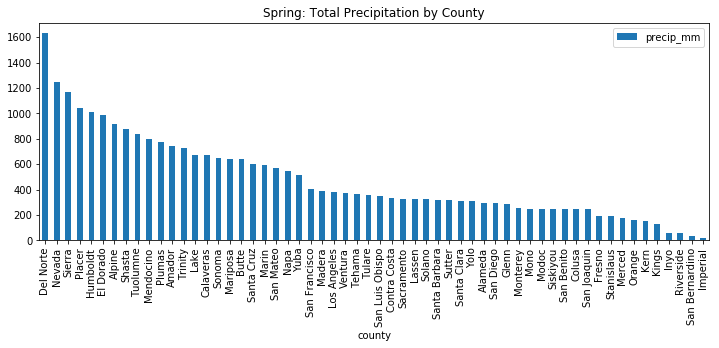

In [97]:
spring.groupby('county').sum().sort_values('precip_mm', ascending=False).plot(kind='bar',y='precip_mm',
                                figsize=(12,4),
                                title='Spring: Total Precipitation by County')

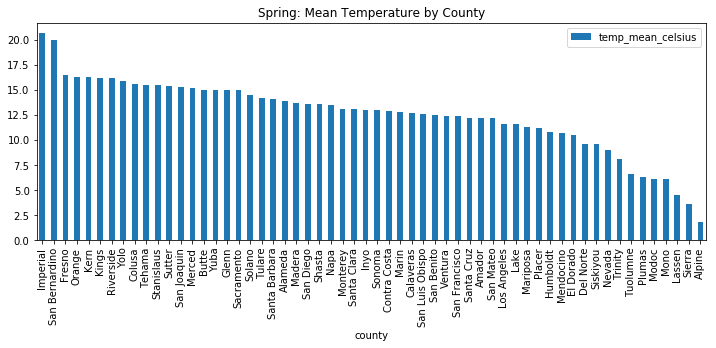

In [98]:
spring.groupby('county').mean().sort_values('temp_mean_celsius', ascending=False).plot(kind='bar',
                                y='temp_mean_celsius',figsize=(12,4),
                                title='Spring: Mean Temperature by County')

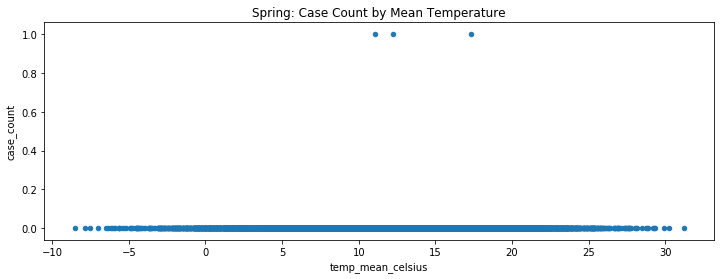

In [99]:
spring.plot(kind='scatter',x='temp_mean_celsius', y='case_count',figsize=(12,4),
                                title='Spring: Case Count by Mean Temperature')

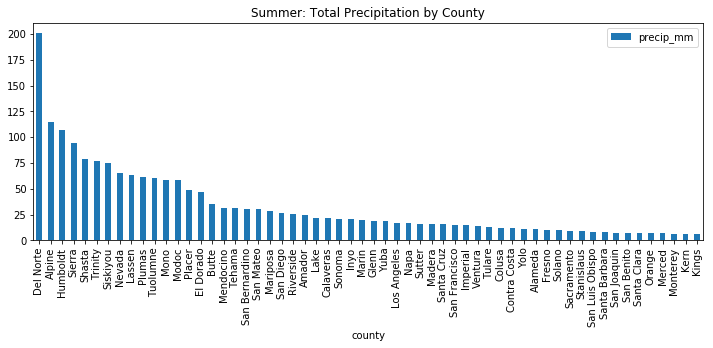

In [100]:
summer.groupby('county').sum().sort_values('precip_mm', ascending=False).plot(kind='bar',y='precip_mm',
                                figsize=(12,4),
                                title='Summer: Total Precipitation by County')

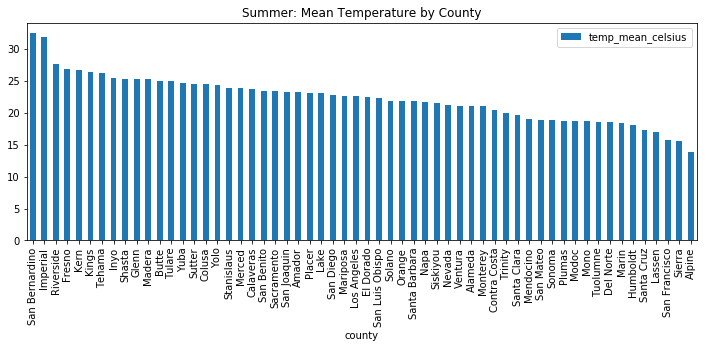

In [101]:
summer.groupby('county').mean().sort_values('temp_mean_celsius', ascending=False).plot(kind='bar',
                                y='temp_mean_celsius',figsize=(12,4),
                                title='Summer: Mean Temperature by County')

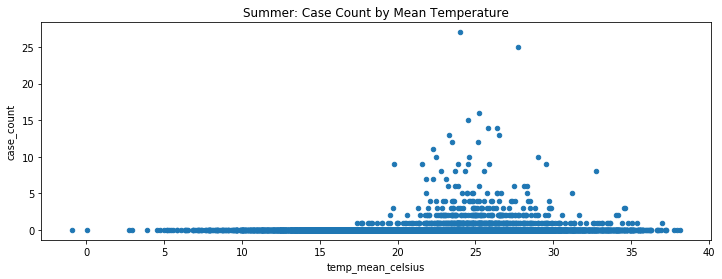

In [102]:
summer.plot(kind='scatter',x='temp_mean_celsius', y='case_count',figsize=(12,4),
                                title='Summer: Case Count by Mean Temperature')

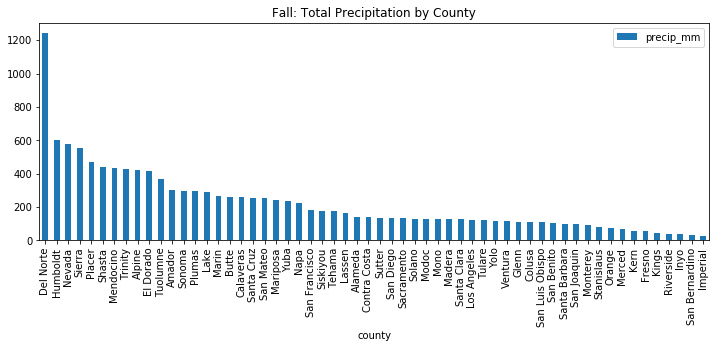

In [103]:
fall.groupby('county').sum().sort_values('precip_mm', ascending=False).plot(kind='bar',y='precip_mm',
                                figsize=(12,4),
                                title='Fall: Total Precipitation by County')

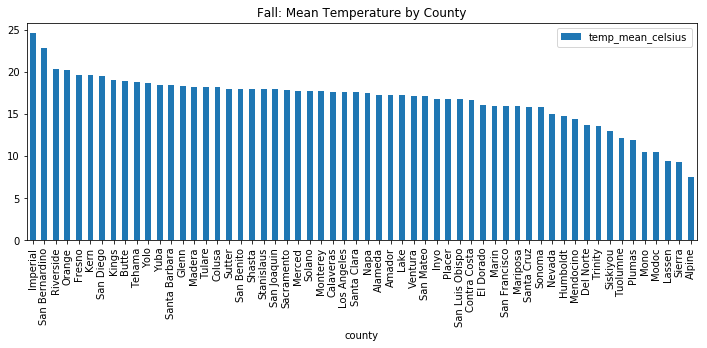

In [104]:
fall.groupby('county').mean().sort_values('temp_mean_celsius', ascending=False).plot(kind='bar',
                                y='temp_mean_celsius',figsize=(12,4),
                                title='Fall: Mean Temperature by County')

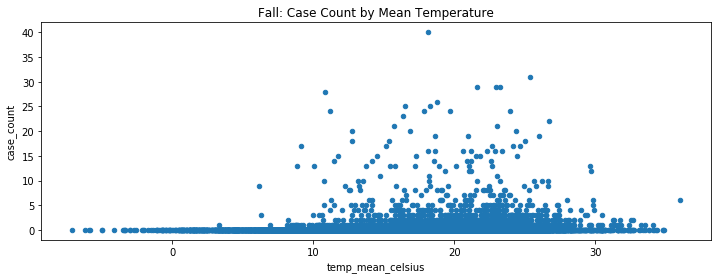

In [105]:
fall.plot(kind='scatter',x='temp_mean_celsius', y='case_count',figsize=(12,4),
                                title='Fall: Case Count by Mean Temperature')

In [106]:
region1=df[(df['region']==1)]
region2=df[(df['region']==2)]
region3=df[(df['region']==3)]
region4=df[(df['region']==4)]
region5=df[(df['region']==5)]

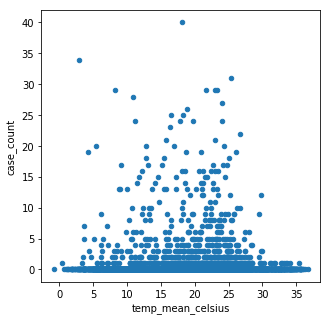

In [107]:
region1.plot.scatter(x='temp_mean_celsius', y='case_count')

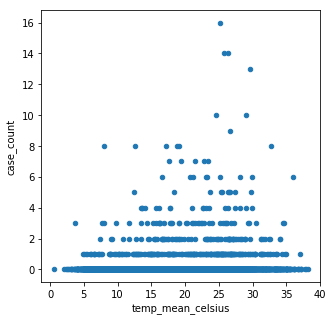

In [108]:
region2.plot.scatter(x='temp_mean_celsius', y='case_count')

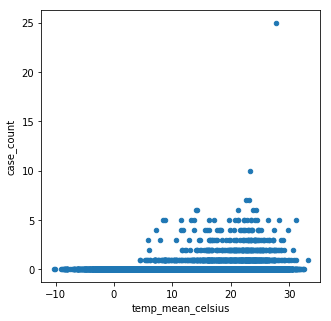

In [109]:
region3.plot.scatter(x='temp_mean_celsius', y='case_count')

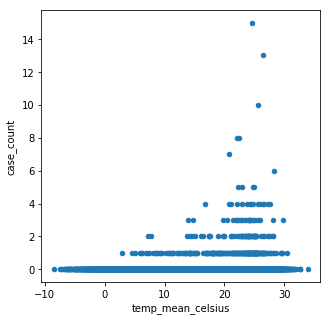

In [110]:
region4.plot.scatter(x='temp_mean_celsius', y='case_count')

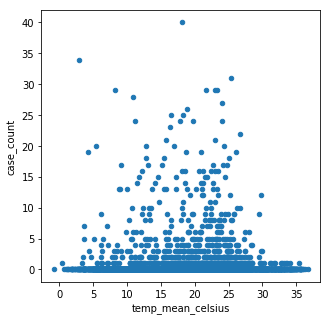

In [111]:
region1.plot.scatter(x='temp_mean_celsius', y='case_count')